In [160]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier


In [161]:
def get_df():
   

    
    credit_df = pd.read_csv("Credit_card.csv", encoding_errors='ignore', delimiter = ',', on_bad_lines='skip' )
    credit_label_df = pd.read_csv("Credit_card_label.csv", encoding_errors='ignore', delimiter = ',', on_bad_lines='skip' )
    
    merged_df = credit_df.merge(credit_label_df, on='Ind_ID')
    new_merged_df = merged_df.dropna()
    return new_merged_df

credit_df = get_df()

In [162]:
credit_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
10,5010869,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,1,1
11,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,1
13,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,5024049,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,-12903.0,-2924,1,0,0,0,Accountants,3,0
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,Drivers,3,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0


In [163]:
def cleaning_data(credit_df):
    credit_df['GENDER'] = np.where(credit_df['GENDER'] == 'F', 1, 0)
    credit_df['Car_Owner'] = np.where(credit_df['Car_Owner'] == 'M', 1, 0)
    credit_df['Propert_Owner'] = np.where(credit_df['Propert_Owner'] == 'N', 1, 0)
   
    class_labels = LabelEncoder()
    credit_df['Type_Income'] = class_labels.fit_transform(credit_df['Type_Income'].values)
    credit_df['EDUCATION'] = class_labels.fit_transform(credit_df['EDUCATION'].values)
    credit_df['Marital_status'] = class_labels.fit_transform(credit_df['Marital_status'].values)

    #housing_map = {'House/ apartment':1,'With parents':2,'Municipal apartment':3,'Rented apartment':4,'Office apartment':5}
    #credit_df['Housing_type'] = credit_df['Housing_type'].map(housing_map)
    credit_df['Housing_type'] = np.where(credit_df['Housing_type'] == 'Housing / apartment', 1, 0)

    #credit_df['Housing_type'] = class_labels.fit_transform(credit_df['Housing_type'].values)
    credit_df['Type_Occupation'] = class_labels.fit_transform(credit_df['Type_Occupation'].values)
    return credit_df

In [164]:
cleaning_data(credit_df)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
8,5010864,0,0,0,1,450000.0,0,3,1,0,-18173.0,-678,1,0,1,1,3,3,1
9,5010868,0,0,0,1,450000.0,1,3,1,0,-18173.0,-678,1,0,1,1,3,3,1
10,5010869,0,0,0,1,450000.0,0,3,3,0,-18173.0,-678,1,0,1,1,3,1,1
11,5018498,1,0,0,0,90000.0,3,3,1,0,-18950.0,-1002,1,1,1,0,2,2,1
13,5018503,1,0,0,0,90000.0,3,3,1,0,-18950.0,-1002,1,1,1,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,5024049,1,0,0,1,144000.0,3,0,1,0,-12903.0,-2924,1,0,0,0,0,3,0
1542,5118268,0,0,1,1,360000.0,2,3,1,0,-11294.0,-3536,1,0,1,0,4,3,0
1544,5023655,1,0,1,0,225000.0,0,1,3,0,-10229.0,-1209,1,0,0,0,0,1,0
1545,5115992,0,0,0,2,180000.0,3,0,1,0,-13174.0,-2477,1,0,0,0,10,4,0


In [165]:
def crime_decision_tree(credit_df):
    X = credit_df.drop('label', axis=1)
    y = credit_df['label']

    #Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, random_state=32)
    

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)

    model = tree.DecisionTreeClassifier(max_depth = 7, random_state=32)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    tree.plot_tree(model, feature_names = list(X.columns),
               filled=True, fontsize=6, rounded=True)

    plt.show()

    rf = RandomForestClassifier(n_estimators=100, random_state=32)
    rf = rf.fit(X_train, y_train)
    print(rf.score(X_test, y_test))

    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)

    y_pred = xgb.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

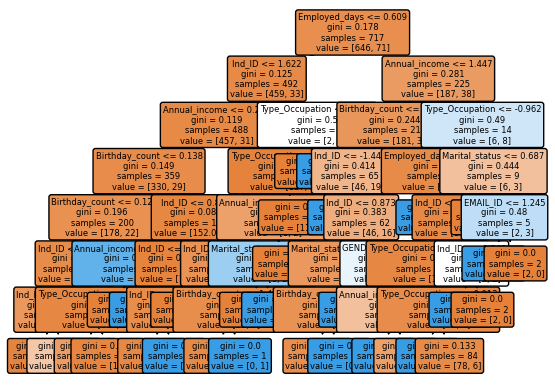

0.8928571428571429


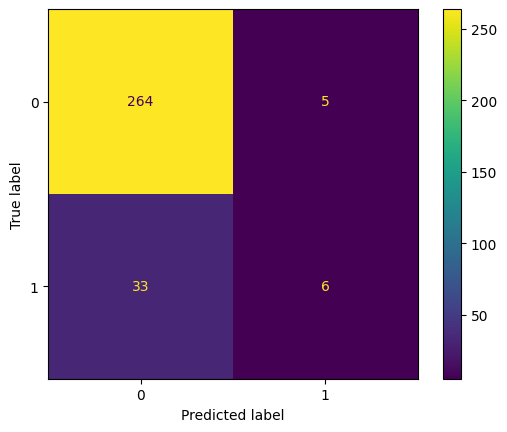

In [166]:
crime_decision_tree(credit_df)

# Inductive vs Deductive

Inductive reasoning reaches from specific facts to general facts, while 
deductive reasoning reaches from general facts to specific facts. Here's
an example that I found online: Inductive Reasoning: Most of our snowstorms
come from the north. It's starting to snow. This snowstorm must be coming
from the north. Deductive Reasoning: All of our snowstorms come from the north.
Also, for the decision tree, random forest model, and xgboost, I played it 
safe and followed the code that we were woking on in class to tune it to 
the best of my ability.